# Pytorch

## 1、Anaconda安装配置

- CUDA版本：11.7
- 安装cudnn
    - conda install cudnn=8.4.1.50 -c conda-forge
- 安装pytorch
    - conda install pytorch torchvision torchaudio cudatoolkit=11.6 -c pytorch -c conda-forge
- 安装Cython
    - pip install Cython
- 安装pycocotools:
    - 下载好 cocoapi 的压缩包，地址：https://github.com/philferriere/cocoapi ，下完后解压(随便哪个目录都可以)
    - 打开 Anaconda Prompt ，激活并进入你需要安装的环境中
    - 通过 Anaconda Prompt 进入到刚刚解压后目录 cocoapi-master\PythonAPI 路径
    - 在 Anaconda Prompt 中输入刚刚复制的加载命令：
        - python setup.py build_ext install
- 在刚刚创建成功的虚拟环境中安装ipykernel
    - conda install ipykernel

## 2、数据操作+数据预处理



In [1]:
import torch

### 数据操作

张量表示一个数组组成的数组

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
# 张量形状
x.shape

torch.Size([12])

In [4]:
# 张量中元素总数
x.numel()

12

改变形状

In [5]:
x = x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
# 全0
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
# 全1
torch.ones((3,4,2))

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]])

通过list转tensor

In [8]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

多个张量连结在一起

In [9]:
# dim为0代表按照行拼在一起，dim为1代表按照列拼在一起
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [10]:
# 通过逻辑运算符构建二元张量
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [11]:
# 对所有元素进行求和产生一个只有一个元素的张量
X.sum()

tensor(66.)

即使形状不同，仍然可以通过调用**广播机制**来执行按元素操作

In [12]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [13]:
# a是三行一列，b是一行两列，但是a+b可以执行，
# 广播机制则将a按列复制为一个3x2矩阵
# 将b按行复制为一个3x2矩阵，然后加一起
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

不同操作可能导致内存重新分配

In [14]:
# 导致分配
before = id(Y)
Y = Y + X
id(Y) == before

False

In [15]:
# 不导致分配（原地操作）
before = id(Y)
Y[:] = Y + X
id(Y) == before

True

In [16]:
# 不导致分配
# 导致分配
before = id(Y)
Y += X
id(Y) == before

True

In [17]:
# 转换为numpy
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [18]:
# 将大小为1的张量转换为Python标量
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 数据预处理

创建一个人工数据集，存储在csv

In [19]:
import os

os.makedirs(os.path.join('.','data'),exist_ok=True)
data_file = os.path.join('.','data','house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [20]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


为了处理缺失的数据，典型的方法包括**插值**和**删除**

In [21]:
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


对于inputs中的类别值或离散值，将NaN视为一个类别

In [22]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


将inputs和outputs转换为张量

In [23]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [24]:
# 注意，以下操作
a = torch.arange(12)
b = a.reshape((3,4))
b[:] = 2
a

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# 注意，以下操作，使用深复制
import copy

a = torch.arange(12)
b = copy.deepcopy(a).reshape((3,4))
b[:] = 2
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 线性代数

1.生成mxn的矩阵

In [27]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

2.矩阵的转置

In [28]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

3.对称矩阵

In [29]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [30]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

4.克隆矩阵

In [32]:
B = A.clone()
A,A+B

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22],
         [24, 26, 28, 30],
         [32, 34, 36, 38]]))

5.两个矩阵按元素乘法，哈达玛积（Hadamard product）（数学符号⊙）

In [33]:
A * B

tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121],
        [144, 169, 196, 225],
        [256, 289, 324, 361]])

In [34]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

6.计算其元素的和

In [35]:
X.sum()

tensor(276)

7.表示任意形状张量的元素和

In [36]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190))

8.指定求和汇总张量的轴

In [37]:
# 对每一行求和
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40, 45, 50, 55]), torch.Size([4]))

In [38]:
# 对每一列求和
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6, 22, 38, 54, 70]), torch.Size([5]))

In [39]:
# 对多个维度一起求和
A_sum_axis2 = A.sum(axis=[0,1])
A_sum_axis2, A_sum_axis2.shape

(tensor(190), torch.Size([]))

9.平均值

In [41]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
# 对全部元素
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [42]:
# 对指定维度
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

10.计算总和或均值时保持轴数不变

In [43]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

11.通过广播将A除以sum_A

In [44]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

12.某个轴计算A元素的累计总和

In [45]:
A, A.cumsum(axis=0)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]))

In [46]:
A, A.cumsum(axis=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  3.,  6.],
         [ 4.,  9., 15., 22.],
         [ 8., 17., 27., 38.],
         [12., 25., 39., 54.],
         [16., 33., 51., 70.]]))

13.点积(相同位置的按元素乘积的和)

In [48]:
x = torch.arange(4,dtype=torch.float32)
y = torch.ones(4,dtype=torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [49]:
# 执行按元素乘法，然后求和来表示点积
torch.sum(x * y)

tensor(6.)

14.矩阵向量积Ax是一个长度为m的列向量

In [50]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

15.将矩阵-矩阵乘法AB看做是简单执行m次矩阵-向量积，并将结果拼接在一起，形成一个nxm矩阵

In [51]:
B = torch.ones(4,3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

16.L2范数

In [52]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

17.矩阵的佛罗贝尼乌斯范数（Frobenius norm）

In [53]:
torch.norm(torch.ones((4,9)))

tensor(6.)

## 线性回归+基础优化算法

### 1、线性回归从0实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

根据带有噪声的线性模型构造一个人造数据集。 我们使用线性模型参数w=[2,−3.4]⊤、b=4.2和噪声项ϵ生成数据集及其标签：

y=Xw+b+ϵ

In [3]:
def synthetic_data(w, b, num_examples):
    '''生成 y=Xw+b+ϵ'''
    # 随机生成num_examples个样本，样本按中心为0，方差为1的正态分布
    X = torch.normal(0, 1, (num_examples, len(w)))
    # 计算y=Xw+b
    y = torch.matmul(X, w) + b
    # 加入随机噪音ϵ
    y += torch.normal(0, 0.01, y.shape)
    # 把y变成列向量返回
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
# 生成特征和标注
features, labels = synthetic_data(true_w, true_b, 1000)

features中的每一行都包含一个二维数据样本，labels中的每一行都包含以为标签值（一个标量）

In [4]:
features[0], labels[0]

(tensor([-0.0679, -1.5066]), tensor([9.1682]))

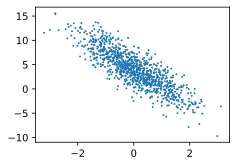

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1)

定义一个data_iter函数，该函数接受批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特点顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_size]
    
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1344, -1.0888],
        [-0.3827, -0.2368],
        [ 1.0352,  1.3737],
        [ 0.8673, -1.0457],
        [ 1.6180,  1.0565],
        [-0.9581, -0.2255],
        [ 0.3676, -0.8563],
        [ 0.8380, -2.7944],
        [-0.9014,  0.5939],
        [-0.5067, -0.7517]]) 
 tensor([11.8806])


定义 初始化模型参数

In [8]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

定义模型

In [9]:
def linreg(X, w, b):
    '''线性回归模型'''
    return torch.matmul(X, w) + b

定义损失函数

In [10]:
def squared_loss(y_hat, y):
    '''均方损失'''
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

定义优化算法

In [12]:
def sgd(params, lr, batch_size):
    '''小批量随机梯度下降'''
    with torch.no_gard():
        for param in params:
            param -= lr * param.grad / batch_size
            # 把梯度置为0，方便下一次计算
            param.grad.zero_()

训练过程

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        # X和y的小批量损失
        l = loss(net(X, w, b), y)
        # 因为l的形状是(batch_size, 1),而不是一个标量。l中所有元素被加到一起
        # 并以此计算关于w,b的梯度
        l.sum().backward()